<a href="https://colab.research.google.com/github/Sukhada11/Deep_Learning/blob/master/dog_cat_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
import tensorflow as tf
from tensorflow.python.framework import ops


%matplotlib inline
np.random.seed(1)

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd drive/My Drive/dogs-vs-cats/

/content/drive/My Drive/dogs-vs-cats


In [0]:
#! mkdir train
#! unzip train.zip -d train


In [0]:
#! mkdir test
#! unzip test1.zip -d test

In [0]:
#!pip install helper

In [0]:
import os
from PIL import Image
import matplotlib.pyplot as plt

import torch
import torchvision
from torch.utils.data import DataLoader, Dataset, random_split
import torchvision.transforms as transforms

#For converting the dataset to torchvision dataset format
class loadDataset(Dataset):
    def __init__(self, file_path,train=True,transform=None):
        self.transform = transform
        self.file_path=file_path
        self.train=train
        self.file_names=[file for _,_,files in os.walk(self.file_path) for file in files]
        print(self.file_names)
        print(self.file_path)
        self.len = len(self.file_names)
        if self.train:
            self.classes_mapping=self.get_classes()
    def __len__(self):
        return len(self.file_names)
    
    def __getitem__(self, index):
        file_name=self.file_names[index]
        image_data=self.pil_loader(self.file_path+"/"+file_name)
        if self.transform:
            image_data = self.transform(image_data)
        if self.train:
            file_name_splitted=file_name.split(".")
            Y1 = self.classes_mapping[file_name_splitted[0]]
            return image_data, Y1
        else:
            return image_data, file_name
          
    def pil_loader(self,path):
        with open(path, 'rb') as f:
            img = Image.open(f)
            return img.convert('RGB')

      
    def get_classes(self):
        classes=[]
        for name in self.file_names:
            name_splitted=name.split(".")
            classes.extend([name_splitted[0]])
        classes=list(set(classes))
        classes_mapping={}
        for i,cl in enumerate(sorted(classes)):
            classes_mapping[cl]=i
        return classes_mapping

In [0]:
#define the transformations
transform = transforms.Compose([
                transforms.Resize(256),
                transforms.RandomCrop(224),
                transforms.RandomHorizontalFlip(),
                transforms.ToTensor()
            ])


In [0]:
T = transforms.Compose([
                transforms.ToTensor()
            ])


In [10]:
full_data = loadDataset("train/train/",train=True,transform=transform)

train_size = int(0.9 * len(full_data))
test_size = len(full_data) - train_size

train_data, validation_data = random_split(full_data, [train_size, test_size])

train_loader = torch.utils.data.DataLoader(train_data, batch_size=32 ,shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_data, batch_size=32, shuffle=True)

['cat.9088.jpg', 'cat.9099.jpg', 'cat.9068.jpg', 'cat.9087.jpg', 'cat.9083.jpg', 'cat.9071.jpg', 'cat.9111.jpg', 'cat.9106.jpg', 'cat.9090.jpg', 'cat.9114.jpg', 'cat.9103.jpg', 'cat.9119.jpg', 'cat.9100.jpg', 'cat.9069.jpg', 'cat.9105.jpg', 'cat.9116.jpg', 'cat.908.jpg', 'cat.9074.jpg', 'cat.9091.jpg', 'cat.9092.jpg', 'cat.9117.jpg', 'cat.91.jpg', 'cat.907.jpg', 'cat.9109.jpg', 'cat.9084.jpg', 'cat.9108.jpg', 'cat.9086.jpg', 'cat.9078.jpg', 'cat.9094.jpg', 'cat.9177.jpg', 'cat.9150.jpg', 'cat.9171.jpg', 'cat.9151.jpg', 'cat.9124.jpg', 'cat.9158.jpg', 'cat.9132.jpg', 'cat.9162.jpg', 'cat.9134.jpg', 'cat.9176.jpg', 'cat.9139.jpg', 'cat.9131.jpg', 'cat.9141.jpg', 'cat.9166.jpg', 'cat.914.jpg', 'cat.9137.jpg', 'cat.917.jpg', 'cat.9148.jpg', 'cat.9159.jpg', 'cat.9178.jpg', 'cat.916.jpg', 'cat.9128.jpg', 'cat.9145.jpg', 'cat.9174.jpg', 'cat.9153.jpg', 'cat.9169.jpg', 'cat.9179.jpg', 'cat.9130.jpg', 'cat.9165.jpg', 'cat.9157.jpg', 'cat.9170.jpg', 'cat.9136.jpg', 'cat.9129.jpg', 'cat.9164.jpg'

In [11]:
test_data = loadDataset("test/test1/",train=False,transform=T)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=1,shuffle=True)


['11490.jpg', '11467.jpg', '11519.jpg', '11511.jpg', '11562.jpg', '11515.jpg', '11540.jpg', '11520.jpg', '11561.jpg', '11549.jpg', '11552.jpg', '11564.jpg', '11543.jpg', '11555.jpg', '11514.jpg', '11523.jpg', '11528.jpg', '11539.jpg', '11517.jpg', '11565.jpg', '11557.jpg', '11527.jpg', '11551.jpg', '11522.jpg', '11524.jpg', '11530.jpg', '11521.jpg', '11507.jpg', '11558.jpg', '11534.jpg', '11547.jpg', '11505.jpg', '11510.jpg', '11512.jpg', '11504.jpg', '11538.jpg', '11537.jpg', '11513.jpg', '11553.jpg', '11516.jpg', '11532.jpg', '11526.jpg', '11508.jpg', '11545.jpg', '11509.jpg', '11550.jpg', '11536.jpg', '11560.jpg', '11541.jpg', '11556.jpg', '11544.jpg', '11548.jpg', '11542.jpg', '11546.jpg', '11518.jpg', '11559.jpg', '11525.jpg', '11503.jpg', '11563.jpg', '11535.jpg', '11531.jpg', '11554.jpg', '11529.jpg', '11533.jpg', '11506.jpg', '11585.jpg', '11588.jpg', '11590.jpg', '11617.jpg', '11609.jpg', '11627.jpg', '11570.jpg', '11612.jpg', '11598.jpg', '11604.jpg', '11589.jpg', '11595.jpg'

In [0]:
full_data.pil_loader('train/train/cat.0.jpg')

In [12]:
#create a iterator

dataiter = iter(train_loader)
images, labels = dataiter.next()
#shape of images bunch
print(images.shape)

#shape of first image in a group of 4
print(images[1].shape)

#class label for first image
print(labels[1])

torch.Size([32, 3, 224, 224])
torch.Size([3, 224, 224])
tensor(0)


In [0]:
#custom function to display images

def imshow(img, title):
    
    #convert image from tensor to numpy for visualization
    npimg = img.numpy()
    #define the size of a figure
    plt.figure(figsize = (10, 10))
    plt.axis("off")
    
    #interchaging the image sizes - transposing
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title, fontsize=15)
    plt.show()

In [0]:
#function to get images and feed into our custom function 'imshow'

def show_batch_images(dataloader):
    
    #getting the images
    images, labels = next(iter(dataloader))
    #make a grid from those images
    img = torchvision.utils.make_grid(images)
    
    #call our custom function
    imshow(img, title = labels)
    #imshow(img, title = [str(x.item()) for x in labels])  

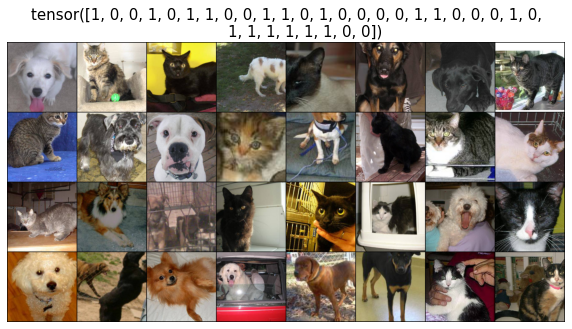

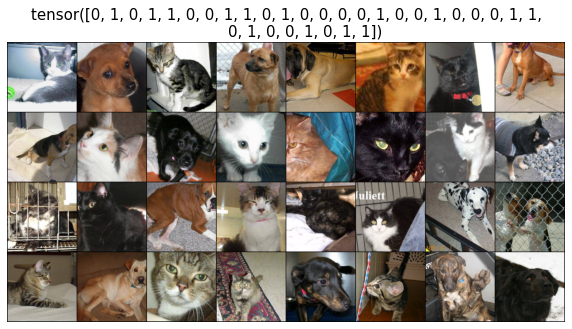

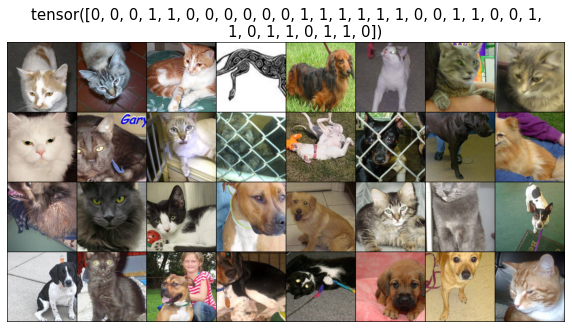

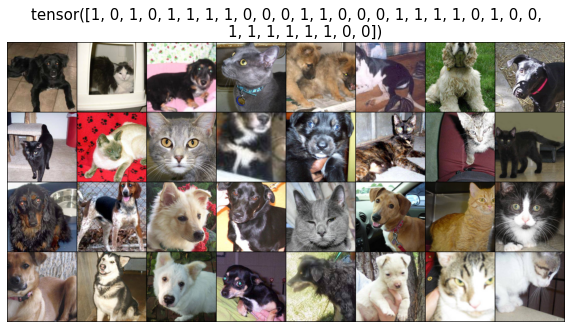

In [15]:
#visualize the training data

for i in range(4):
    show_batch_images(train_loader)

In [0]:
from torch.optim.lr_scheduler import StepLR
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


In [0]:
def eval(dataloader, net,mode):
    acc_count = 0

    #function to calculate the accuracy
    total, correct = 0, 0
    final_acc = 0
    if mode != 'train' :
      net.eval()
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        out = net(inputs)
        
        out = torch.exp(out)
        
        pred = torch.argmax(out, dim=1)
        correct = pred.eq(labels)
        acc_count += correct.sum().item()

        

    acc = acc_count / (len(dataloader) * 32) * 100
    print('----------Acc: {}%----------'.format(acc))
    return acc

In [0]:
from torch.autograd import Variable
import torch.nn.functional as F

class SimpleCNN(torch.nn.Module):
    
    #Our batch shape for input x is (3, 32, 32)
    
    def __init__(self):
       
        super(SimpleCNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=5, stride=1, padding=0), #(4,32,32,3) --> (4,28,28,32)
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)) #(4,28,28,32) --> (4,14,14,32)
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=0), #(4,14,14,32) --> (4,10,10,64)
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)) #(4,10,10,64) --> (4,5,5,64)
        
        self.fc1 = nn.Linear(5* 5* 64, 1000)
        self.fc2 = nn.Linear(1000, 2)
    def forward(self, x):
      out = self.layer1(x)
      out = self.layer2(out)
     
      out = out.view(-1, 5* 5* 64)
      #print(out.shape)

      out = F.relu(self.fc1(out))
      y= self.fc2(out)
      return (y)

LeNet

In [0]:
import torch
from torch import nn
import torch.nn.functional as F

class LeNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.convs = nn.Sequential(
            nn.Conv2d(3, 8, 5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2)),
            nn.Conv2d(8, 12, 5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2)),
        )
        self.fc = nn.Sequential(
            nn.Linear(37632, 10000),
            nn.Linear(10000, 1000),
            nn.Linear(1000, 240),
            nn.Linear(240, 84),
            nn.Linear(84, 2),
        )
    def forward(self, x):
        x = self.convs(x)
        x = x.view(x.shape[0], -1)
        y = self.fc(x)
        return y

In [0]:

def set_param_requires_grad(model):
    for param in model.parameters():
        param.requires_grad = False

AlexNet

In [0]:
from torch import nn
from torchvision import models

import sys



def AlexNet():
    alexnet = models.alexnet(pretrained=True)
    set_param_requires_grad(alexnet)
    alexnet.classifier[6] = nn.Linear(4096, 2)

    return alexnet

ResNet

In [0]:
from torch import nn
from torchvision import models

import sys


def ResNet():
    resnet = models.resnet18(pretrained=True)
    set_param_requires_grad(resnet)
    in_features = resnet.fc.in_features
    resnet.fc = nn.Linear(in_features, 2)

    return resnet

In [0]:
from torchvision import models
import copy
import torch
import torch.nn as nn

loss_arr = []
loss_epoch_arr = []
max_epochs =120
min_loss=1000
acc=0

import torch.optim as optim
net = torch.load('net_max.pt')
net=ResNet().to(device)

#opt = optim.Adam(net.parameters(), lr=1e-5, weight_decay=1e-5)
#loss list
loss_epoch_arr = []
criterion = torch.nn.CrossEntropyLoss().to(device)
opt = torch.optim.Adam(net.parameters())

max_acc = 0
#iterate or epochs
for epoch in range(max_epochs):
    
  
    #iterate through all the batches to complete one pass
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        opt.zero_grad()
        
        #run the model
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        opt.step()

        del inputs, labels, outputs
        torch.cuda.empty_cache()
        
        if (i + 1) % 50 == 0:
            print('epoch {} ({} / {}) loss: {}'.format(epoch, i, len(train_loader),loss.item()))
            acc_train = eval(train_loader,net, "train")
            acc_val = eval(validation_loader,net,"")
            print("epoch: %d/%d,val_acc:%0.2f,train_acc: %0.2f" %(epoch, max_epochs,acc_val , acc_train))
            if acc_val > max_acc:
               max_acc = acc_val
               torch.save(net, 'net_max.pt')
        loss_epoch_arr.append(loss.item())

 

In [0]:
net = torch.load('net_max.pt')

In [0]:
import pandas as pd
def make_predictions(dataloader):
    
    pred = dict()
    net.eval()
    for  data in test_loader:
        images, labels = data
        images = images.cuda()
        #print(labels)
        net.cuda()
        out = net(images)
        for i in range(len(images)):
            out = torch.exp(out)
            pred = torch.argmax(out, dim=1)

            
    df = pd.DataFrame(list(pred.items()), columns=['ImageId', 'Class'])
    return(df)

In [0]:
df = make_predictions(test_loader)

In [0]:
def img_loader(path):
        with open(path, 'rb') as f:
            img = Image.open(f)
            return img.convert('RGB')

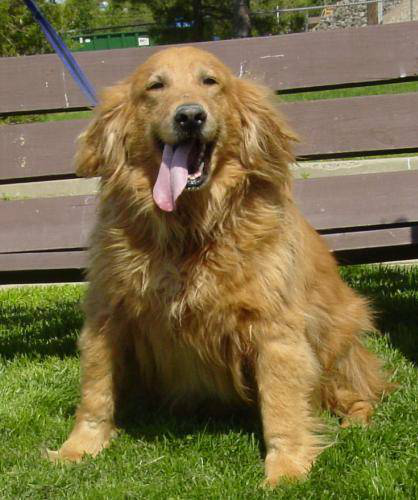

In [50]:
img_loader('test/test1/11515.jpg')

In [53]:
#create a iterator
img=img_loader('test/test1/11515.jpg')
trans = transforms.ToTensor()(img).unsqueeze_(0)
#shape of first image in a group of 4
print(trans.shape)
op = net(trans.to(device))
op= torch.exp(op)
pred = torch.argmax(op, dim=1)

if pred.item() == 1 :
  print("doggo")
else:
  print("meow")

torch.Size([1, 3, 500, 418])
doggo
